# Задание:  


<b>Данные. Выполнить первичную обработку данных. Сделать первые выводы.</b>

1) Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок-диаграммы признаков. Сделайте первые выводы о возможном распределении признаков.
2) В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.
3) В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.

<b>Снижение размерности. Метод PCA</b> (Principal Component Analysis = метод главных компонент).

4) Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z).
5) Найти SVD разложение матрицы Z (матрицы U, S, V).
6) Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в спектральной матричной  норме и норме Фробениуса.
7) Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.

<b>Снижение размерности. Интерпретация скрытых факторов.</b>

8) Выписать матрицу коэффициентов разложения признаков zj по главным факторам. Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с каждым из главных факторов.
9) На основе анализа структуры матрицы коэффициентов разложения, предложить интерпретацию выделенным главным факторам. Дать интерпретацию построенной выше карте клиентов.

<b>Снижение размерности. Метод MDS</b> (Multidimensional Scaling = многомерное шкалирование).

10) Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний.
11) Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.
12) Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы. 

# Настройки/Гиперпараметры/Импорты

In [1]:
num_epochs = 200 # число эпох для обучения модели (заполнение пропусков)

In [2]:
import pandas as pd # для удобной работы с датасетом
import matplotlib.pyplot as plt # для построения графиков
import matplotlib.patches as plt_ # для эллипса на графике (кластеризация)
import torch # для создания модели (заполнение пропусков)
import numpy as np # для подсчёта SVD разложения
from scipy.spatial import distance_matrix # для подсчёта расстояний между клиентами
from sklearn.manifold import MDS # для MDS (Multidimensional Scaling)

# Данные. Выполнить первичную обработку данных. Сделать первые выводы.

### 1) Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков.

In [4]:
data = pd.read_excel("./data/23MAG_HW_1_v7.xls", header=None, names=["Возраст (лет)", "Количество иждивенцев", "Доход (руб./мес.)", "Срок проживания в регионе (лет)", "Оценка автомобиля заемщика (USD)", "Размер кредита (тыс. руб.)"]) # считывание данных (header=None и указаны names, так как файл не содержит названия колонок)
data

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,54.0,3.0,16700.0,18.0,18000.0,177000.0
1,36.0,2.0,33800.0,NaN,34000.0,337000.0
2,NaN,1.0,12900.0,9.0,12000.0,126000.0
3,44.0,2.0,17700.0,13.0,18000.0,180000.0
4,54.0,4.0,20000.0,19.0,22000.0,211000.0
5,41.0,NaN,11900.0,11.0,12000.0,119000.0
6,31.0,1.0,22700.0,4.0,22000.0,221000.0
7,28.0,1.0,NaN,2.0,30000.0,300000.0
8,45.0,2.0,12600.0,13.0,13000.0,128000.0
9,25.0,1.0,31900.0,0.0,30000.0,NaN


#### Вычисление основных характеристик (с пропуском NaN значений).

        Среднее значение:

In [5]:
data.mean() # вывод среднего значения по колонкам (NaN пропускаются)

Возраст (лет) 39.081633
Количество иждивенцев 2.000000
Доход (руб./мес.) 19432.653061
Срок проживания в регионе (лет) 10.224490
Оценка автомобиля заемщика (USD) 20959.183673
Размер кредита (тыс. руб.) 198448.979592
dtype: float64

        Стандартное отклонение:

Стандартное отклонение — показатель рассеивания значений случайной величины относительно её математического ожидания (считается, как корень из дисперсии).

In [6]:
data.std(ddof=0) # вывод стандартного отклонения (standard deviation) по колонкам (NaN пропускаются, делим на N сэмплов, а не N-1)

Возраст (лет) 8.854462
Количество иждивенцев 0.979796
Доход (руб./мес.) 9965.233191
Срок проживания в регионе (лет) 4.866652
Оценка автомобиля заемщика (USD) 11362.234588
Размер кредита (тыс. руб.) 98697.861198
dtype: float64

        Медиана:

Медиана — такое число, что половина из элементов выборки больше него, а другая половина меньше.

In [7]:
data.median() # вывод медианы по колонкам (NaN пропускаются)

Возраст (лет) 40.0
Количество иждивенцев 2.0
Доход (руб./мес.) 16800.0
Срок проживания в регионе (лет) 11.0
Оценка автомобиля заемщика (USD) 19000.0
Размер кредита (тыс. руб.) 186000.0
dtype: float64

        Квартили:

Квартили (особый вид квантилей — значений признака, которые делят упорядоченные данные на некоторое число равных частей) == перцентили 25%, 50% (медиана), 75%.

In [8]:
data.quantile([0.25, 0.5, 0.75]) # вывод квартилей 0.25, 0.5, 0.75

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0.25,33.0,1.25,12100.0,7.0,13000.0,126000.0
0.50,40.0,2.00,16800.0,11.0,19000.0,186000.0
0.75,46.0,3.00,28700.0,14.0,30000.0,293000.0


#### Графики распределений признаков.

        Гистограмма:

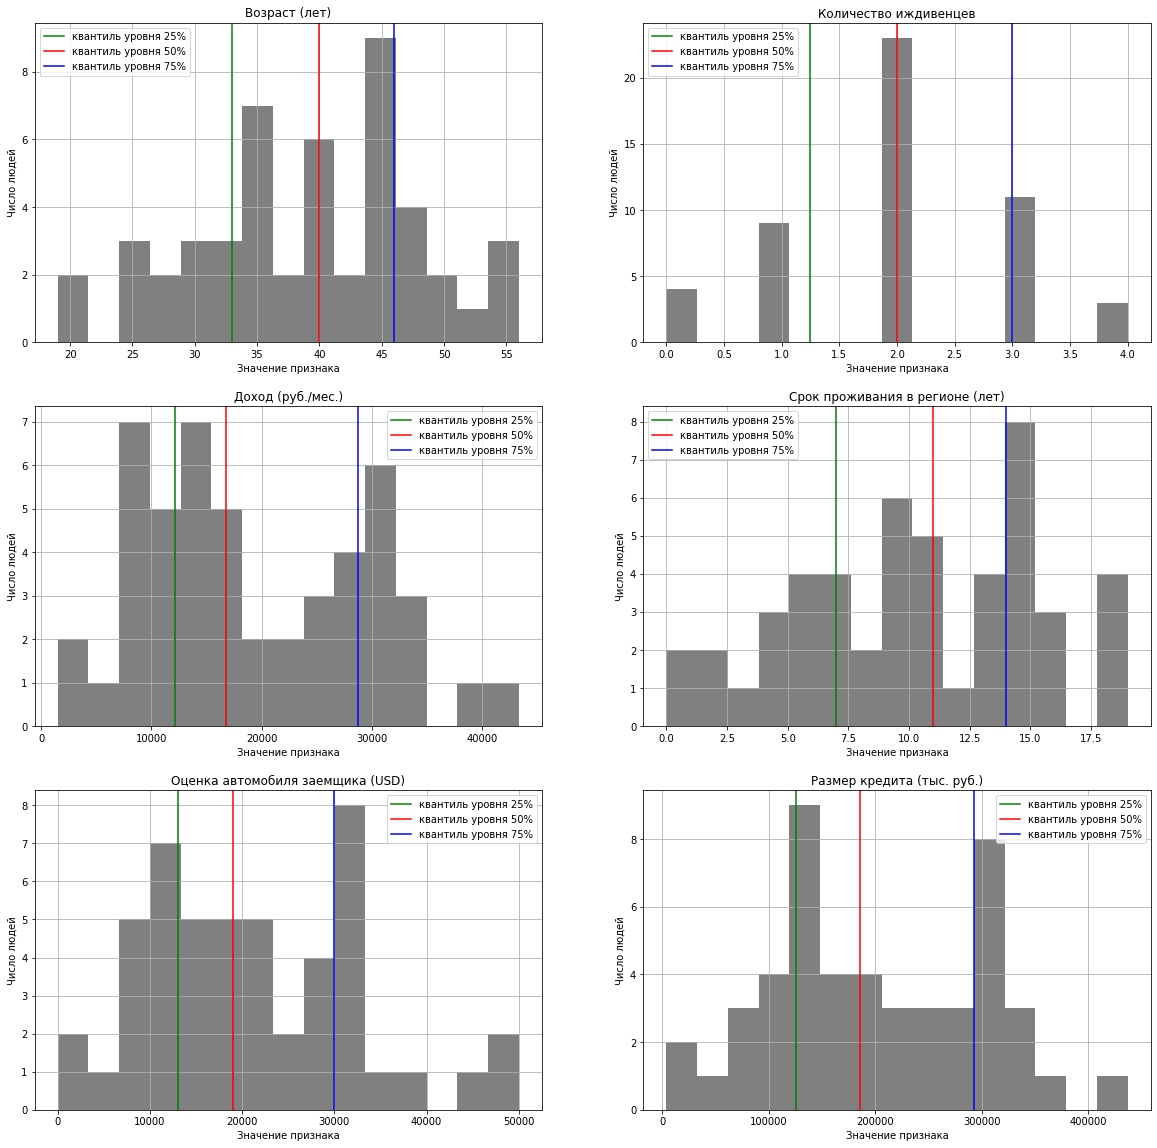

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20)) # основные настройки выводимых графиков (nrows-число строк, ncols-число столбцов, figsize-размер выводимой фигуры)
# fig - выводимая фигура, axes - оси в этой фигуре (под каждый график)

quantiles = ['25%','50%', '75%'] # квартили
colors = ['green', 'red', 'blue'] # цвета для квартилей

for col, ax in zip(data.columns, axes.flat): 
# zip - объединяем колонки (название признака) и соответствующие подграфики, чтобы удобно по ним итерироваться
# axes.flat рассматривает axes как одномерный массив (A 1-D iterator over the array)

    ax.set_title(col) # добавление заголовка каждому графику
    ax.grid() # добавление сетки на графики
    ax.hist(x=data[col], bins=15, color="grey") # построение гистограммы (bins - число столбцов)
    ax.set_xlabel('Значение признака') # подпись под осью x
    ax.set_ylabel('Число людей') # подпись под осью y
    
    for i in range(len(quantiles)):
        ax.axvline(data[col].describe()[quantiles[i]], color=colors[i]) # добавление линии-квартиля
    ax.legend(["квантиль уровня 25%", "квантиль уровня 50%", "квантиль уровня 75%"]) # добавление подписи квартилей
plt.show() # вывод графиков

        Ящик с усами:

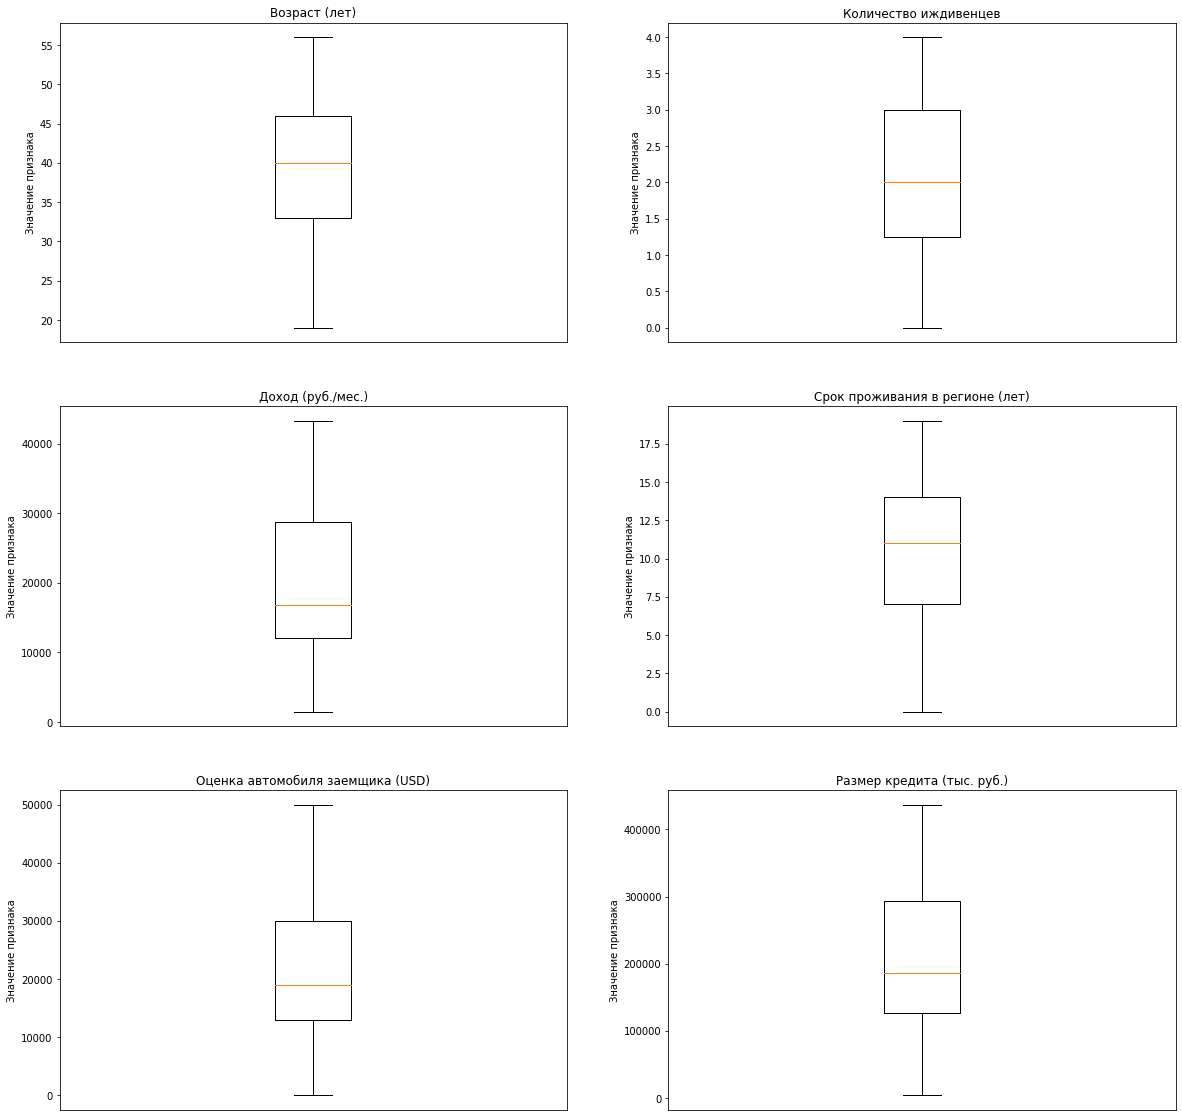

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20)) # основные настройки выводимых графиков (nrows-число строк, ncols-число столбцов, figsize-размер выводимой фигуры)

for col, ax in zip(data.columns, axes.flat): 
# zip - объединяем колонки (название признака) и соответствующие подграфики, чтобы удобно по ним итерироваться
# axes.flat рассматривает axes как одномерный массив (A 1-D iterator over the array)

    ax.set_title(col) # добавление заголовка каждому графику
    ax.boxplot(x=data[col].dropna())
    ax.set_ylabel('Значение признака') # подпись под осью y
    ax.set_xticks(ticks=[]) # убирание подписи под осью x
plt.show() # вывод графиков

Центром ящика является медиана. Краями ящика являются 1-й и 3-й квартили. Усами ящика принято брать по 1,5 межквартильных размаха (межквартильный размах составляет разницу между третьим и первым квартилем) в каждую сторону. Все, что выходит за границы полутора межквартильных размахов является выбросом. Если данных, заходящих за границы усов нет — этими границами становятся максимальное и минимальное встреченные значения. 

Ширина ящика отражает вариативность 50% показателей исследуемого признака. Длина же усов показывает весь разброс показателей в выборке и наличие выбросов.

#### Первичные выводы о распределении признаков.

In [11]:
data.describe()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
count,49.000000,50.000000,49.000000,49.000000,49.000000,49.000000
mean,39.081633,2.000000,19432.653061,10.224490,20959.183673,198448.979592
std,8.946221,0.989743,10068.502614,4.917085,11479.981097,99720.664280
min,19.000000,0.000000,1500.000000,0.000000,0.000000,4000.000000
25%,33.000000,1.250000,12100.000000,7.000000,13000.000000,126000.000000
50%,40.000000,2.000000,16800.000000,11.000000,19000.000000,186000.000000
75%,46.000000,3.000000,28700.000000,14.000000,30000.000000,293000.000000
max,56.000000,4.000000,43300.000000,19.000000,50000.000000,437000.000000


Если не рассматривать NaN значения, то среди признаков нет выбросов и все они укладываются в "ящик с усами".

Отдельно по признакам:
* Возраст (лет) — принимает значение от 19 до 56 лет с медианой в 40. Можно заметить, что его среднее значение смещено в большую сторону, отчего можно сделать вывод, что основной контингент составляют уже взрослые люди. Между первым и последним квартилем, отражающими 50% выборки (33-46 лет) можно заметить некую симметрию в распределении, так как медиана практически равноудалена от соседних квартилей.

* Количество иждивенцев — от 0 до 4. Имеет практически симметричное распределение значений — медиана совпадает со средним и равняется 2, первый квартиль на 0.25 смещён в большую сторону (1.25), третий же квартиль равняется 3. Большинство имеет ровно двух иждивенцев; примерно в два раза меньше людей с одним или тремя иждивенцами; и ещё почти в два раза меньше с 0 или 4.

* Доход (руб./мес.) — согласно графикам, большинство клиентов имеют доход ниже среднего (медиана=16800, тогда как среднее~19432), с сильным удалением третьего квартиля от медианы и близким первым квартилем, отчего можно предположить, что у некоторой части клиентов банка доход находится в узком диапазоне ниже среднего, а у другой, наоборот, выше и с приличным разбросом.

* Срок проживания в регионе (лет) — варьируется от 0 до 19 (в среднем составляем ~10). Распределение же имеет небольшое смещение в большую сторону от своего среднего значения. Можно заметить некоторое сходство с распределение возраста клиентов банка. 

* Оценка автомобиля заемщика (USD) — распределение почти аналогично доходам. Также можно увидеть, что основная масса имеет показатели  — чуть ниже среднего и лишь у небольшого числа клиентов этот параметр имеет большое (либо очень малое) значение. Эмпирически заметно, что гистограмма для оценки автомобиля сильно схожа с таковой для дохода (имеет близкие пики значений). 

* Размер кредита (тыс. руб.) — имеет аналогичную доходу и оценке автомобиля тенденцию к значениям ниже среднего и пикам на гистограмме. 

        Можно сделать вывод, что признаки "Возраст (лет)" и "Срок проживания в регионе (лет)" имеют довольно схожее распределение (смещены чуть выше среднего), так как оба связаны с временем жизни клиентов. Признаки, связанные с обеспеченность "Доход (руб./мес.)", "Оценка автомобиля заемщика (USD)", "Размер кредита (тыс. руб.)" также имеют похожее распределение с небольшим снижением ниже среднего. Особняком стоит лишь признак "Количество иждивенцев" имеющий практически симметричное распределение. 

### 2) В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.

        Для заполнения пропусков воспользуемся линейной регрессией, обученной на данных без пропусков. Так как при таком подходе учитываются значения всех признаков (возможные зависимости).

In [12]:
# определение модели
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size): # конструктор модели (input_size - число признаков, на которых идёт обучение)
        super(LinearRegression, self).__init__() # инициализация 
        self.linear = torch.nn.Linear(in_features=input_size, out_features=1) # линейный слой (out_features=1, так как предсказываем только одно число)

        self.linear.weight.data = torch.zeros((1, input_size), dtype=self.linear.weight.dtype) # зануление весов (для чистоты обучения)
        self.linear.bias.data = torch.zeros(1, dtype=self.linear.bias.dtype) # зануление bias (для чистоты обучения)

    def forward(self, X):
        pred = self.linear(X) # применяем линейный слой
        return pred # возвращаем предсказание

In [13]:
rows_to_imputation = {} # словарь для индексов строк, в которых есть NaN значение
for col in data.columns: # идём по каждому столбцу
    rows_to_imputation[col] = [] # изначально словарь NaN пустой для каждого столбца
    for row in data.index: # идём по строкам
        if pd.isna(data[col][row]): # если значение NaN
            rows_to_imputation[col].append(row) # запоминаем данную строку
rows_to_imputation # вывод строк с пропущенным значением по каждому признаку

{'Возраст (лет)': [2, 16, 36],
 'Количество иждивенцев': [5, 46],
 'Доход (руб./мес.)': [7, 18, 33],
 'Срок проживания в регионе (лет)': [1, 20, 45],
 'Оценка автомобиля заемщика (USD)': [13, 27, 39],
 'Размер кредита (тыс. руб.)': [9, 23, 49]}

In [14]:
data # данные до замены NaN значений

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,54.0,3.0,16700.0,18.0,18000.0,177000.0
1,36.0,2.0,33800.0,NaN,34000.0,337000.0
2,NaN,1.0,12900.0,9.0,12000.0,126000.0
3,44.0,2.0,17700.0,13.0,18000.0,180000.0
4,54.0,4.0,20000.0,19.0,22000.0,211000.0
5,41.0,NaN,11900.0,11.0,12000.0,119000.0
6,31.0,1.0,22700.0,4.0,22000.0,221000.0
7,28.0,1.0,NaN,2.0,30000.0,300000.0
8,45.0,2.0,12600.0,13.0,13000.0,128000.0
9,25.0,1.0,31900.0,0.0,30000.0,NaN


In [15]:
criterion = torch.nn.MSELoss() # функция потерь, с помощью которой будет обучаться модель

for col in data.columns: # идём по столбцам
    rows_with_NaN = [] # массив для хранения текущих строк с NaN значениями (уменьшается по мере заполнения столбцов с NaN значениями)
    for key in rows_to_imputation.keys(): # идём по найденным столбцам с NaN значениями
        for row in rows_to_imputation[key]: # запоминаем, сколько на данный момент есть NaN значений
            rows_with_NaN.append(row) 
    X = data.drop(index=rows_with_NaN) # удаляем строки из рассмотрения

    model = LinearRegression(data.shape[1]-1).to(torch.float64) # создаём объект модели (новый для каждого столбца, -1 так как один из признаков будет таргетом)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # определяем оптимайзер — Adam и передаём в него веса модели с lr
    X, Y = torch.Tensor(X.drop(columns=[col]).values).to(torch.float64), torch.Tensor(X[col]).reshape((-1,1)).to(torch.float64) # задаём признаки, на которых обучаемся и таргет, что должны предсказать (в виде тензоров)

    for epoch in range(num_epochs): # проводим обучение num_epochs раз
        Y_pred = model(X) # делаем предсказание
        loss = criterion(Y_pred, Y) # считаем ошибку по MSE loss

        optimizer.zero_grad() # обнуляем градиенты во всех обучаемых torch.Tensor (ставит w.grad = 0 в torch.Tensor с requires_grad=True) (вызывается перед loss.backward(), чтобы не аккумулировать градиенты за несколько итераций обучения)
        loss.backward() # считаем dloss/dw для каждого веса модели w, у которого requires_grad=True (сохраняется в w.grad следующим образом w.grad += dloss/dw)
        optimizer.step() # обновляет веса модели (тензоры, у которых стоит флаг requires_grad=True, используя значение из w.grad следующим образом w += -lr * w.grad)

    for row in rows_to_imputation.pop(col): # проходим по пропущенным значениям в столбце и удаляем столбец из списка NaN значений
        X = torch.Tensor(data.drop(columns=[col]).loc[row]).to(torch.float64) # берём признаки из строки, где таргет - NaN
        pred = model(X) # предсказываем значение

        # data[col][row] = int(pred) if pred%1>0.5 else  int(pred+1) # обновляем значение
        data[col][row] = int(pred) # обновляем значение

In [16]:
data # данные после замены NaN значений

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,54.0,3.0,16700.0,18.0,18000.0,177000.0
1,36.0,2.0,33800.0,13.0,34000.0,337000.0
2,21.0,1.0,12900.0,9.0,12000.0,126000.0
3,44.0,2.0,17700.0,13.0,18000.0,180000.0
4,54.0,4.0,20000.0,19.0,22000.0,211000.0
5,41.0,1.0,11900.0,11.0,12000.0,119000.0
6,31.0,1.0,22700.0,4.0,22000.0,221000.0
7,28.0,1.0,29179.0,2.0,30000.0,300000.0
8,45.0,2.0,12600.0,13.0,13000.0,128000.0
9,25.0,1.0,31900.0,0.0,30000.0,112636.0


In [17]:
data.describe() # вывод информации о данных после заполнения пропусков

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,38.538462,2.000000,19496.153846,10.153846,21238.480769,192086.826923
std,9.493985,0.990148,10065.460679,4.892510,11413.452671,100301.032180
min,19.000000,0.000000,1500.000000,0.000000,0.000000,4000.000000
25%,33.000000,1.000000,12050.000000,6.750000,13000.000000,121250.000000
50%,39.500000,2.000000,17250.000000,11.000000,19500.000000,178500.000000
75%,46.000000,3.000000,28819.750000,14.000000,30000.000000,292250.000000
max,56.000000,4.000000,43300.000000,19.000000,50000.000000,437000.000000


### 3) В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.

        Для проверки на наличие выбросов после замены NaN значений воспользуемся уже рассмотренным в первом пункте "ящиком с усами".

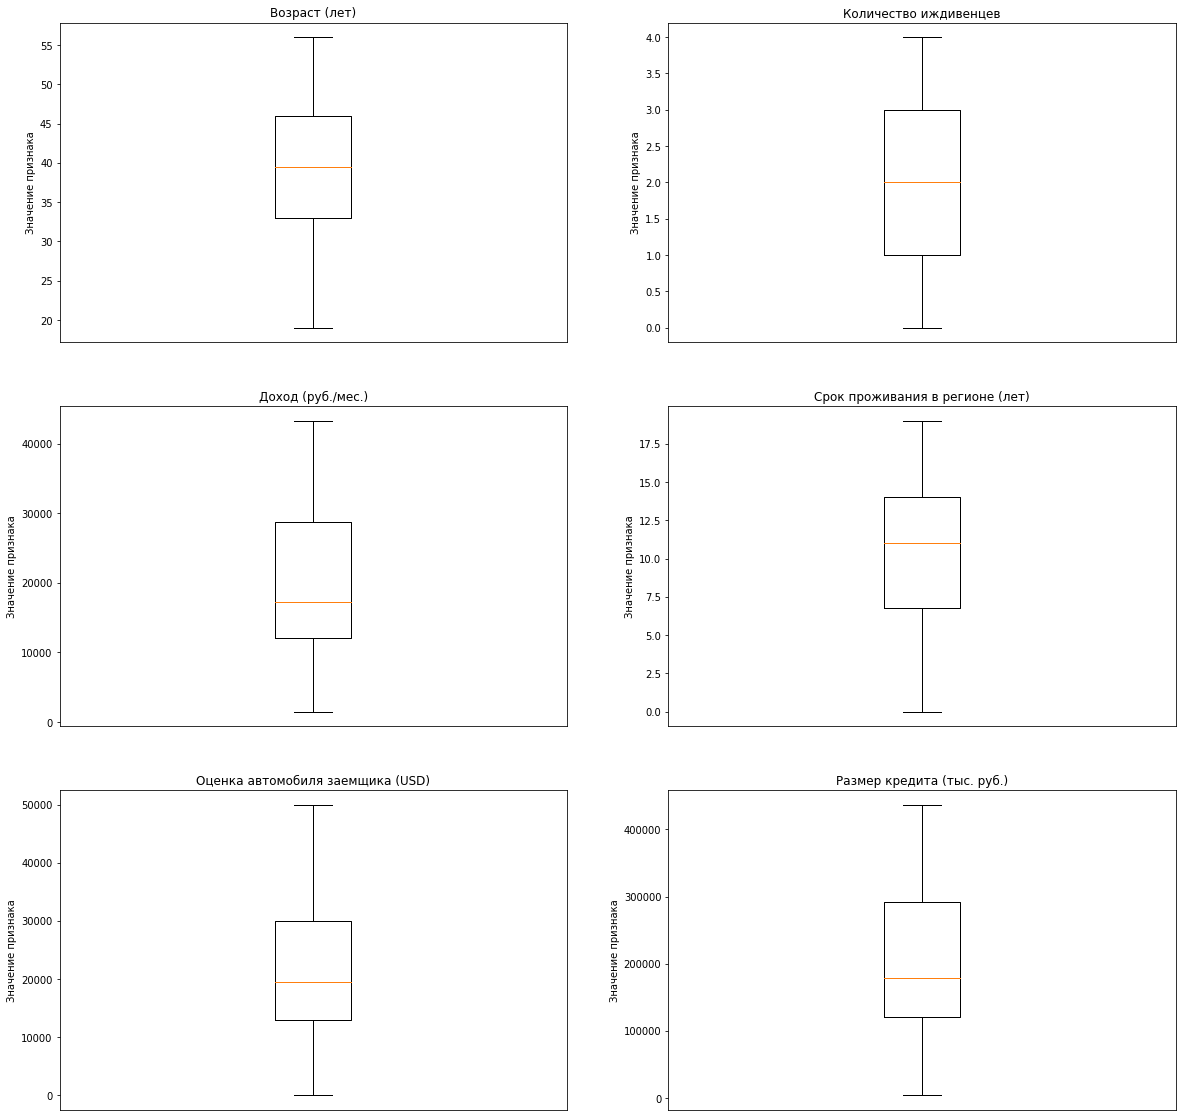

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20)) # основные настройки выводимых графиков (nrows-число строк, ncols-число столбцов, figsize-размер выводимой фигуры)

for col, ax in zip(data.columns, axes.flat): 
# zip - объединяем колонки (название признака) и соответствующие подграфики, чтобы удобно по ним итерироваться
# axes.flat рассматривает axes как одномерный массив (A 1-D iterator over the array)

    ax.set_title(col) # добавление заголовка каждому графику
    ax.boxplot(x=data[col])
    ax.set_ylabel('Значение признака') # подпись под осью y
    ax.set_xticks(ticks=[]) # убирание подписи под осью x
plt.show() # вывод графиков

        На графиках "ящик с усами" выбросов всё так же не наблюдается, но чтобы точно удостовериться в их отсутствии — посчитаем всё руками.

In [19]:
for col in data.columns:
    quartile_1 = data[col].quantile(q=0.25) # считаем первый квартиль
    quartile_3 = data[col].quantile(q=0.75) # считаем третий квартиль
    interquartile_range = quartile_3 - quartile_1 # считаем межквартильный размах

    print(f"У признака '{col}' максимальное значение не достаёт до квартильного интервала на {(quartile_3+1.5*interquartile_range) - data[col].max()}")
    print(f"У признака '{col}' минимальное значение не достаёт до квартильного интервала на {data[col].min() - (quartile_1-1.5*interquartile_range)}")

У признака 'Возраст (лет)' максимальное значение не достаёт до квартильного интервала на 9.5
У признака 'Возраст (лет)' минимальное значение не достаёт до квартильного интервала на 5.5
У признака 'Количество иждивенцев' максимальное значение не достаёт до квартильного интервала на 2.0
У признака 'Количество иждивенцев' минимальное значение не достаёт до квартильного интервала на 2.0
У признака 'Доход (руб./мес.)' максимальное значение не достаёт до квартильного интервала на 10674.375
У признака 'Доход (руб./мес.)' минимальное значение не достаёт до квартильного интервала на 14604.625
У признака 'Срок проживания в регионе (лет)' максимальное значение не достаёт до квартильного интервала на 5.875
У признака 'Срок проживания в регионе (лет)' минимальное значение не достаёт до квартильного интервала на 4.125
У признака 'Оценка автомобиля заемщика (USD)' максимальное значение не достаёт до квартильного интервала на 5500.0
У признака 'Оценка автомобиля заемщика (USD)' минимальное значение не

Можно сделать вывод, что у всех признаков остался приличный запас до границы, после которой их значения начали бы считаться выбросами.

# Снижение размерности. Метод PCA (Principal Component Analysis = метод главных компонент).

### 4) Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z)

#### Центрирование:

In [20]:
Z = data.apply(lambda x: x-x.mean()) # вычитаем среднее значение по столбцам (чтобы сумма в них стала равняться нулю)
Z

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,15.461538,1.0,-2796.153846,7.846154,-3238.480769,-15086.826923
1,-2.538462,0.0,14303.846154,2.846154,12761.519231,144913.173077
2,-17.538462,-1.0,-6596.153846,-1.153846,-9238.480769,-66086.826923
3,5.461538,0.0,-1796.153846,2.846154,-3238.480769,-12086.826923
4,15.461538,2.0,503.846154,8.846154,761.519231,18913.173077
5,2.461538,-1.0,-7596.153846,0.846154,-9238.480769,-73086.826923
6,-7.538462,-1.0,3203.846154,-6.153846,761.519231,28913.173077
7,-10.538462,-1.0,9682.846154,-8.153846,8761.519231,107913.173077
8,6.461538,0.0,-6896.153846,2.846154,-8238.480769,-64086.826923
9,-13.538462,-1.0,12403.846154,-10.153846,8761.519231,-79450.826923


In [21]:
Z.sum()

Возраст (лет) -8.526513e-14
Количество иждивенцев 0.000000e+00
Доход (руб./мес.) -6.184564e-11
Срок проживания в регионе (лет) 2.842171e-14
Оценка автомобиля заемщика (USD) -1.091394e-11
Размер кредита (тыс. руб.) -6.984919e-10
dtype: float64

Сумма значений по каждому признаку даёт ноль.

#### Нормирование:

In [22]:
# считаем эвклидову норму для каждого столбца-признака (корень суммы квадратов элементов)
for col in Z.columns: # идём по всем столбцам-признакам
    eucl_norm = 0 
    for row in Z.index: # идём по значениям признака
        eucl_norm += Z[col][row]**2 # суммируем квадраты
    eucl_norm = eucl_norm**(1/2) # берём корень
    Z[col] = Z[col]/eucl_norm # делим на значение полученной нормы

In [270]:
# проверяем, что эвклидова норма каждого признака равна 1 
for col in Z.columns: # идём по всем столбцам-признаком
    eucl_norm = 0 
    for row in Z.index: # идём по значениям признака
        eucl_norm += Z[col][row]**2 # суммируем квадраты
    eucl_norm = eucl_norm**(1/2) # берём корень
    print(f"{col}: {round(eucl_norm, 2)}")

Возраст (лет): 1.0
Количество иждивенцев: 1.0
Доход (руб./мес.): 1.0
Срок проживания в регионе (лет): 1.0
Оценка автомобиля заемщика (USD): 1.0
Размер кредита (тыс. руб.): 1.0


### 5) Найти SVD разложение матрицы Z (матрицы U, S, V).

$Z = U*S*V^T$ — SVD разложение матрицы $Z$ (nxm), где $U$ - ортогональная матрица размера nxn, $S$ - диагональная матрица сингулярных чисел $Z$ размера nxm (по большей степени она заполнена нулями), $V$ - ортогональная матрица размера mxm.

In [24]:
U,S,V_T = np.linalg.svd(Z) # производим SVD разложение матрицы Z

In [25]:
U # ортогональная матрица размера 52x52

array([[ 0.00461127, 0.23452576, -0.03345634, ..., 0.13417229,
 0.19894482, -0.15382416],
 [ 0.17914225, -0.02670795, 0.0143802 , ..., -0.07878211,
 0.05716874, 0.08474156],
 [-0.13114948, -0.13442227, 0.16156243, ..., 0.06600684,
 0.06109143, -0.08001837],
 ...,
 [-0.01073799, -0.08348185, 0.01306528, ..., 0.67421874,
 0.02744278, 0.01958862],
 [ 0.02291605, -0.20427944, -0.05364553, ..., 0.01388412,
 0.95215008, 0.02915718],
 [-0.13622804, 0.14128919, -0.01889956, ..., 0.03565335,
 0.02622451, 0.96186318]])

In [26]:
S # диагональная матрица из сингулярных чисел Z, размера 52x6 (6x6 с заполнением нулями)

array([1.68867309, 1.50131254, 0.72194494, 0.42658017, 0.34147434,
 0.27324715])

In [27]:
V_T # ортогональная матрица размера 6x6 (сразу транспонированная)

array([[ 0.04712081, 0.33729401, 0.53073183, 0.01349532, 0.53244641,
 0.56449517],
 [ 0.57725166, 0.49066054, -0.14401541, 0.61486212, -0.13803361,
 -0.09046336],
 [-0.63904081, 0.27481028, -0.44137736, 0.35734355, 0.42679234,
 -0.10698628],
 [-0.03315744, -0.670026 , 0.01066963, 0.62167683, -0.02660011,
 0.40331408],
 [-0.50082993, 0.2610124 , 0.51050977, 0.24172177, -0.60073704,
 -0.03327579],
 [-0.06524539, 0.23000431, -0.49197077, -0.22171274, -0.3920501 ,
 0.70565288]])

        Проверим, что полученное разложение правильно:

In [28]:
S_full = np.zeros((52,6)) # приводим S к полному матричному виду
for i in range(len(S)):
    S_full[i][i] = S[i]
S_full

array([[1.68867309, 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 1.50131254, 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0.72194494, 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0.42658017, 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0.34147434,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0.27324715],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. ]])

In [29]:
np.matmul(np.matmul(U, S_full), V_T) # перемножаем матрицы

array([[ 2.28044229e-01, 1.41421356e-01, -3.88993477e-02,
 2.24563947e-01, -3.97318871e-02, -2.10623787e-02],
 [-3.74400974e-02, -1.70682807e-16, 1.98991298e-01,
 8.14594708e-02, 1.56567007e-01, 2.02310012e-01],
 [-2.58677036e-01, -1.41421356e-01, -9.17639357e-02,
 -3.30241098e-02, -1.13343972e-01, -9.22623283e-02],
 [ 8.05529367e-02, 3.40315009e-17, -2.49876140e-02,
 8.14594708e-02, -3.97318871e-02, -1.68741464e-02],
 [ 2.28044229e-01, 2.82842712e-01, 7.00937351e-03,
 2.53184842e-01, 9.34283642e-03, 2.64042543e-02],
 [ 3.63055489e-02, -1.41421356e-01, -1.05675669e-01,
 2.42176805e-02, -1.13343972e-01, -1.02034870e-01],
 [-1.11185744e-01, -1.41421356e-01, 4.45710545e-02,
 -1.76128586e-01, 9.34283642e-03, 4.03650287e-02],
 [-1.55433131e-01, -1.41421356e-01, 1.34705177e-01,
 -2.33370376e-01, 1.07492283e-01, 1.50655147e-01],
 [ 9.53020660e-02, 5.40606680e-17, -9.59374558e-02,
 8.14594708e-02, -1.01075291e-01, -8.94701734e-02],
 [-1.99680519e-01, -1.41421356e-01, 1.72559004e-01,
 -2.90612166e-01, 1.07492283e-01, -1.10919507e-01],
 [-2.58677036e-01, 1.41421356e-01, -1.57149084e-01,
 2.42176805e-02, 3.28328539e-01, 8.08512745e-02],
 [ 2.15564197e-02, -1.94536274e-19, 2.64858007e-02,
 -4.40321464e-03, -2.92584445e-03, 3.05924866e-02],
 [ 1.10051195e-01, 1.41421356e-01, 1.03000336e-01,
 8.14594708e-02, 8.29549216e-02, 1.14357133e-01],
 [ 1.24800325e-01, 1.41421356e-01, 1.28041457e-01,
 1.10080366e-01, 1.18104692e-01, 1.40882605e-01],
 [ 1.98545971e-01, 1.41421356e-01, -1.54366737e-01,
 2.24563947e-01, -1.37881334e-01, -1.39728961e-01],
 [-1.99680519e-01, -2.82842712e-01, -2.26707752e-01,
 -2.33370376e-01, -2.48299462e-01, -2.41642615e-01],
 [-2.73426166e-01, 1.41421356e-01, -1.09849189e-01,
 1.67322156e-01, -1.01075291e-01, -9.78466380e-02],
 [ 5.10546782e-02, 5.19150192e-17, -7.36786819e-02,
 2.42176805e-02, -8.88066105e-02, -6.85290118e-02],
 [-5.21892266e-02, -1.41421356e-01, -1.79672181e-01,
 -6.16450050e-02, -1.74687377e-01, -1.73234820e-01],
 [-2.26909681e-02, -1.92806595e-18, 1.39652404e-02,
 -6.16450050e-02, -1.51945253e-02, 1.38395573e-02],
 [-1.25934873e-01, -1.41421356e-01, 1.57256097e-01,
 2.42176805e-02, 1.07492283e-01, 1.53447301e-01],
 [ 6.80729043e-03, 2.40985400e-17, -8.75904156e-02,
 -4.40321464e-03, -1.01075291e-01, -8.52819411e-02],
 [ 1.10051195e-01, 6.53907984e-17, -8.20257221e-02,
 1.10080366e-01, -8.88066105e-02, -7.41133215e-02],
 [ 1.10051195e-01, 1.41421356e-01, -4.58552145e-02,
 1.10080366e-01, -5.20005679e-02, -1.83706797e-01],
 [-8.16874851e-02, -6.98998899e-17, 2.57420580e-01,
 -1.47507690e-01, 2.05641730e-01, 2.58153110e-01],
 [-6.69383559e-02, -6.37095709e-17, 1.48909057e-01,
 -1.18886795e-01, 1.07492283e-01, 1.49259069e-01],
 [ 5.10546782e-02, 2.82842712e-01, 3.31152768e-01,
 -3.30241098e-02, 2.79253815e-01, 3.41917756e-01],
 [ 8.05529367e-02, 6.34329526e-17, -1.02893323e-01,
 8.14594708e-02, -1.01700994e-01, -9.64505606e-02],
 [ 1.24800325e-01, 1.41421356e-01, 1.28041457e-01,
 1.10080366e-01, 1.07492283e-01, 1.40882605e-01],
 [ 2.15564197e-02, -1.41421356e-01, -1.66887298e-01,
 2.42176805e-02, -1.74687377e-01, -1.64858355e-01],
 [ 6.80729043e-03, -1.41421356e-01, -1.40455004e-01,
 2.42176805e-02, -1.50150015e-01, -1.38332884e-01],
 [-8.16874851e-02, -2.82842712e-01, -2.03057805e-01,
 -9.02659001e-02, -2.11493419e-01, -2.09532833e-01],
 [ 1.69047712e-01, 1.41421356e-01, -6.67228150e-02,
 1.67322156e-01, -6.42692488e-02, -5.45682373e-02],
 [ 2.57542488e-01, 2.82842712e-01, 8.82538982e-02,
 2.53184842e-01, 8.29549216e-02, 1.05980668e-01],
 [ 1.69047712e-01, 1.41421356e-01, -3.75081743e-02,
 1.67322156e-01, -3.97318871e-02, -2.38545336e-02],
 [-2.88175295e-01, -9.38028593e-18, -1.59931431e-01,
 5.28385757e-02, 3.52865901e-01, 1.10474024e-02],
 [ 1.39549454e-01, 4.67267080e-17, 1.34997323e-01,
 -3.30241098e-02, 9.52236025e-02, 1.39486527e-01],
 [-5.21892266e-02, -4.77990008e-17, 1.41953190e-01,
 -1.18886795e-01, 9.52236025e-02, 1.42278682e-01],
 [-2.14429648e-01, -2.82842712e-01, 7.93503887e-02,
 -2.90612

In [30]:
Z # преобразованная матрица Z

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,0.228044,0.141421,-0.038899,0.224564,-0.039732,-0.021062
1,-0.037440,0.000000,0.198991,0.081459,0.156567,0.202310
2,-0.258677,-0.141421,-0.091764,-0.033024,-0.113344,-0.092262
3,0.080553,0.000000,-0.024988,0.081459,-0.039732,-0.016874
4,0.228044,0.282843,0.007009,0.253185,0.009343,0.026404
5,0.036306,-0.141421,-0.105676,0.024218,-0.113344,-0.102035
6,-0.111186,-0.141421,0.044571,-0.176129,0.009343,0.040365
7,-0.155433,-0.141421,0.134705,-0.233370,0.107492,0.150655
8,0.095302,0.000000,-0.095937,0.081459,-0.101075,-0.089470
9,-0.199681,-0.141421,0.172559,-0.290612,0.107492,-0.110920


        После выполнения матричного умножения мы получили матрицу, аналогичную Z. Следовательно произведённое SVD разложение верно.

### 6) Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в спектральной матричной норме и норме Фробениуса.

        Рассмотрим возможные количества скрытых факторов, от 1 до 6 (6 - количество сингулярных чисел Z, при k=6 аппроксимацией матрицы Z будет сама же Z).

Хорошей аппроксимацией будем считать ту, у которой относительная погрешность не превышает значение <b>0.2</b>, то есть у которой доля объяснённой вариации данных равна <b>80%</b> (0.8).

Посчитаем долю объяснённой вариации данных с помощью нормы Фробениуса и спектральной.

In [31]:
f_norn_Z = sum(x**2 for x in S) # подсчёт нормы Фробениуса у матрицы Z (без корня)
for k in range(1, len(S)+1): # идём по возможным значениям k
    f_norn_Zk = sum(x**2 for x in S[:k]) # норма Фробениуса у матрицы Zk (без корня)
    print(f"Доля объяснённой вариации в норме Фробениуса при k={k} равна {round(f_norn_Zk/f_norn_Z*100, 2)}%, погрешность {round((1-f_norn_Zk/f_norn_Z)*100, 2)}%")

Доля объяснённой вариации в норме Фробениуса при k=1 равна 47.53%, погрешность 52.47%
Доля объяснённой вариации в норме Фробениуса при k=2 равна 85.09%, погрешность 14.91%
Доля объяснённой вариации в норме Фробениуса при k=3 равна 93.78%, погрешность 6.22%
Доля объяснённой вариации в норме Фробениуса при k=4 равна 96.81%, погрешность 3.19%
Доля объяснённой вариации в норме Фробениуса при k=5 равна 98.76%, погрешность 1.24%
Доля объяснённой вариации в норме Фробениуса при k=6 равна 100.0%, погрешность 0.0%


In [32]:
sp_norn_Z = S[0] # спектральная норма Z равна первому сингулярному числу в SVD разложении
for k in range(0, len(S)-1): # идём по возможным значениям k
    sp_norn_Zk = S[k+1] # для погрешности нужно первое, не вошедщее сингулярное число
    print(f"Доля объяснённой вариации в спектральной норме при k={k+1} равна {round((1-sp_norn_Zk/sp_norn_Z)*100, 2)}%, погрешность {round(sp_norn_Zk/sp_norn_Z*100, 2)}%")

Доля объяснённой вариации в спектральной норме при k=1 равна 11.1%, погрешность 88.9%
Доля объяснённой вариации в спектральной норме при k=2 равна 57.25%, погрешность 42.75%
Доля объяснённой вариации в спектральной норме при k=3 равна 74.74%, погрешность 25.26%
Доля объяснённой вариации в спектральной норме при k=4 равна 79.78%, погрешность 20.22%
Доля объяснённой вариации в спектральной норме при k=5 равна 83.82%, погрешность 16.18%


Следовательно, для хорошей аппроксимации матрицы Z достаточно <b>2 скрытых факторов</b>, если ориентироваться на норму Фробениуса (доля объяснённой вариации~85%).

In [33]:
K=2 # число скрытых факторов

        Замена значения исходных признаков линейными комбинациями главных факторов:

Матрица главных факторов:

In [34]:
primary_factors = U[:,:K]
primary_factors

array([[ 0.00461127, 0.23452576],
 [ 0.17914225, -0.02670795],
 [-0.13114948, -0.13442227],
 [-0.02312298, 0.07140091],
 [ 0.07885678, 0.28069088],
 [-0.13009992, 0.00436466],
 [-0.00231007, -0.16867036],
 [ 0.0921411 , -0.2334427 ],
 [-0.08861969, 0.09389228],
 [ 0.01490598, -0.26176878],
 [ 0.10238324, -0.0633072 ],
 [ 0.01819455, 0.00237 ],
 [ 0.12872489, 0.09749744],
 [ 0.15718524, 0.10765796],
 [-0.10311724, 0.25043455],
 [-0.29425052, -0.20565564],
 [-0.07714756, 0.03534076],
 [-0.07244748, 0.04891084],
 [-0.19965459, -0.04779796],
 [ 0.00309874, -0.03474786],
 [ 0.10304366, -0.11893704],
 [-0.0877518 , 0.02364811],
 [-0.07460518, 0.10789711],
 [-0.06001996, 0.15386655],
 [ 0.22858233, -0.15097624],
 [ 0.12777019, -0.10758885],
 [ 0.36408062, 0.02050029],
 [-0.09374812, 0.08936666],
 [ 0.1538391 , 0.10863369],
 [-0.19009233, 0.01399099],
 [-0.16559274, 0.00193009],
 [-0.26004259, -0.10926664],
 [-0.02517423, 0.19534231],
 [ 0.15502548, 0.2726764 ],
 [ 0.00201144, 0.18843316],
 [ 0.05706949, -0.10693002],
 [ 0.12271074, 0.0100217 ],
 [ 0.11979379, -0.09970197],
 [-0.01068711, -0.30753621],
 [ 0.16080566, -0.09287343],
 [ 0.16576626, -0.09395187],
 [ 0.01459365, 0.13851755],
 [-0.05193909, 0.10207582],
 [-0.07172096, 0.02536267],
 [-0.08640574, 0.12850941],
 [-0.14478218, -0.009541 ],
 [ 0.19742624, -0.06612882],
 [ 0.12698853, -0.07828554],
 [-0.31021967, -0.14314806],
 [-0.01073799, -0.08348185],
 [ 0.02291605, -0.20427944],
 [-0.13622804, 0.14128919]])

Аппроксимация матрицы $Z$ с помощью главных факторов:

In [35]:
Zk = np.zeros(shape=Z.shape) # заготовка в виде нулевой матрицы
for i in range(Zk.shape[1]): # заполняем каждый признак
    for k in range(K): # идём по числу скрытых факторов
        Zk[:,i] += S[k] * V_T[k][i] * primary_factors[:,k] # заполняем столбце, отвечающий за признак i (V_T[k][i] == V[i][k])
Zk

array([[ 0.2036152 , 0.17538633, -0.04657454, 0.21659587, -0.04445502,
 -0.02745614],
 [-0.0088914 , 0.08236171, 0.1663277 , -0.02057161, 0.16660653,
 0.17439426],
 [-0.12693085, -0.17372016, -0.0884767 , -0.12707402, -0.09006362,
 -0.10676155],
 [ 0.06003861, 0.03942603, -0.03616131, 0.06538324, -0.03558704,
 -0.03173916],
 [ 0.24953135, 0.25168187, 0.00998524, 0.26090289, 0.01273432,
 0.03704837],
 [-0.0065697 , -0.07088706, -0.11754347, 0.00106414, -0.11788096,
 -0.12461024],
 [-0.14635948, -0.12556423, 0.03439822, -0.15575229, 0.03287678,
 0.02070569],
 [-0.19497783, -0.11948036, 0.133053 , -0.21339118, 0.13122333,
 0.11953803],
 [ 0.07431873, 0.01868838, -0.0997245 , 0.08465241, -0.09913788,
 -0.09722839],
 [-0.22567193, -0.18433786, 0.06995681, -0.24129912, 0.06764914,
 0.0497609 ],
 [-0.04671744, 0.01168108, 0.10544698, -0.05610566, 0.10517488,
 0.10619458],
 [ 0.0035017 , 0.01210906, 0.01579412, 0.00260239, 0.01586809,
 0.01702204],
 [ 0.09473756, 0.14513904, 0.09428731, 0.09293344, 0.0955356 ,
 0.10946522],
 [ 0.10580766, 0.16883406, 0.11759757, 0.10296121, 0.11901951,
 0.13521505],
 [ 0.20883018, 0.12574537, -0.14656401, 0.22882623, -0.14461353,
 -0.13230874],
 [-0.2016424 , -0.31909212, -0.21925165, -0.19654649, -0.22195052,
 -0.25256279],
 [ 0.02448879, -0.01790842, -0.07678326, 0.03086493, -0.07668925,
 -0.07834051],
 [ 0.03662309, -0.00523516, -0.07550491, 0.04349859, -0.07527543,
 -0.07570317],
 [-0.05731024, -0.14892877, -0.16860244, -0.04867227, -0.16960977,
 -0.18382867],
 [-0.02986715, -0.02383151, 0.0102901 , -0.03200514, 0.00998702,
 0.0076731 ],
 [-0.09487566, -0.02892163, 0.11806671, -0.10744252, 0.11729694,
 0.11437943],
 [ 0.01351172, -0.03256159, -0.08375903, 0.01982978, -0.08380073,
 -0.08686095],
 [ 0.08757097, 0.0369872 , -0.09019226, 0.09789965, -0.08943929,
 -0.08577114],
 [ 0.12857027, 0.07915733, -0.08705966, 0.14066644, -0.08585163,
 -0.07811109],
 [-0.11265265, 0.01898141, 0.23750583, -0.13415699, 0.23681181,
 0.23840026],
 [-0.08307339, -0.00647844, 0.13777382, -0.09640351, 0.13717755,
 0.1364087 ],
 [ 0.04673677, 0.22247402, 0.3218685 , 0.02722092, 0.32310675,
 0.34427483],
 [ 0.06998859, 0.0124336 , -0.10334227, 0.08035793, -0.10281115,
 -0.10150241],
 [ 0.106387 , 0.16764693, 0.11438769, 0.10378565, 0.1158087 ,
 0.13189283],
 [-0.00300088, -0.09796641, -0.17339196, 0.00858303, -0.1738167 ,
 -0.18310527],
 [-0.01150381, -0.09289643, -0.14882692, -0.00199206, -0.14928904,
 -0.15811305],
 [-0.11538633, -0.2286045 , -0.20943386, -0.10679022, -0.21116806,
 -0.23304511],
 [ 0.16728736, 0.12955723, -0.06479735, 0.17974683, -0.06311595,
 -0.05052746],
 [ 0.24864659, 0.28916224, 0.07998293, 0.25524055, 0.08288058,
 0.11074449],
 [ 0.16346285, 0.1399521 , -0.03893882, 0.17398852, -0.03724076,
 -0.02367442],
 [-0.0881282 , -0.04626277, 0.0742671 , -0.09740655, 0.07347205,
 0.06892393],
 [ 0.01844946, 0.07727583, 0.10781055, 0.01204751, 0.10825584,
 0.11561266],
 [-0.07687304, -0.00521187, 0.12891988, -0.0893049 , 0.12837134,
 0.12773407],
 [-0.26737208, -0.23262904, 0.05691493, -0.28413029, 0.05412213,
 0.03158019],
 [-0.06769181, 0.02317778, 0.16419963, -0.08206685, 0.16383117,
 0.16590114],
 [-0.0682317 , 0.02520882, 0.16887865, -0.08294931, 0.16851487,
 0.17077628],
 [ 0.12120542, 0.11034909, -0.01686987, 0.12819816, -0.01558365,
 -0.00490123],
 [ 0.08432961, 0.04560917, -0.06861954, 0.09304256, -0.06785322,
 -0.06337413],
 [ 0.01627322, -0.02216775, -0.06976237, 0.02177782, -0.06974226,
 -0.07181244],
 [ 0.10449533, 0.04544958, -0.10522493, 0.11665795, -0.10432102,
 -0.09981943],
 [-0.01978912, -0.08949317, -0.12769562, -0.01210677, -0.1282005 ,
 -0.13671749],
 [-0.04160003, 0.06373711, 0.19123768, -0.05654435, 0.19121542,
 0.19717733],
 [-0.05774032, 0.01466219, 0.13073754, -0.06937143, 0.13040217,
 0.1316838 ],
 [-0.14874184, -0.28214256, -0.24707862, -0.13920966, -0.24926237,
 -0.27627474],
 [-0.07320274, -0.06761177, 0.00842606, -0.07730682, 0.00764525,
 0.00110202],
 [-0.17521227, -0.137426

Значения ошибок аппроксимации:

In [36]:
E = Z - Zk # E - матрица разности оригинальных значений признаков и полученных после аппроксимации
E

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,0.024429,-0.033965,0.007675,0.007968,0.004723,0.006394
1,-0.028549,-0.082362,0.032664,0.102031,-0.010040,0.027916
2,-0.131746,0.032299,-0.003287,0.094050,-0.023280,0.014499
3,0.020514,-0.039426,0.011174,0.016076,-0.004145,0.014865
4,-0.021487,0.031161,-0.002976,-0.007718,-0.003391,-0.010644
5,0.042875,-0.070534,0.011868,0.023154,0.004537,0.022575
6,0.035174,-0.015857,0.010173,-0.020376,-0.023534,0.019659
7,0.039545,-0.021941,0.001652,-0.019979,-0.023731,0.031117
8,0.020983,-0.018688,0.003787,-0.003193,-0.001937,0.007758
9,0.025991,0.042917,0.102602,-0.049313,0.039843,-0.160680


In [37]:
for i in E.columns:
    error = 0
    for j in E.index:
        error += E[i][j]**2
    print(f"Квадрат Эвклидовой нормы ошибки для признака '{i}' равен {error}")

Квадрат Эвклидовой нормы ошибки для признака 'Возраст (лет)' равен 0.24261186611336752
Квадрат Эвклидовой нормы ошибки для признака 'Количество иждивенцев' равен 0.13294854206066553
Квадрат Эвклидовой нормы ошибки для признака 'Доход (руб./мес.)' равен 0.15001950612254394
Квадрат Эвклидовой нормы ошибки для признака 'Срок проживания в регионе (лет)' равен 0.14736666555881558
Квадрат Эвклидовой нормы ошибки для признака 'Оценка автомобиля заемщика (USD)' равен 0.1486240400795007
Квадрат Эвклидовой нормы ошибки для признака 'Размер кредита (тыс. руб.)' равен 0.07287325074355824


### 7) Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.

        Представления клиентов векторами меньшей размерности (размерности 2): 

In [38]:
primary_factors

array([[ 0.00461127, 0.23452576],
 [ 0.17914225, -0.02670795],
 [-0.13114948, -0.13442227],
 [-0.02312298, 0.07140091],
 [ 0.07885678, 0.28069088],
 [-0.13009992, 0.00436466],
 [-0.00231007, -0.16867036],
 [ 0.0921411 , -0.2334427 ],
 [-0.08861969, 0.09389228],
 [ 0.01490598, -0.26176878],
 [ 0.10238324, -0.0633072 ],
 [ 0.01819455, 0.00237 ],
 [ 0.12872489, 0.09749744],
 [ 0.15718524, 0.10765796],
 [-0.10311724, 0.25043455],
 [-0.29425052, -0.20565564],
 [-0.07714756, 0.03534076],
 [-0.07244748, 0.04891084],
 [-0.19965459, -0.04779796],
 [ 0.00309874, -0.03474786],
 [ 0.10304366, -0.11893704],
 [-0.0877518 , 0.02364811],
 [-0.07460518, 0.10789711],
 [-0.06001996, 0.15386655],
 [ 0.22858233, -0.15097624],
 [ 0.12777019, -0.10758885],
 [ 0.36408062, 0.02050029],
 [-0.09374812, 0.08936666],
 [ 0.1538391 , 0.10863369],
 [-0.19009233, 0.01399099],
 [-0.16559274, 0.00193009],
 [-0.26004259, -0.10926664],
 [-0.02517423, 0.19534231],
 [ 0.15502548, 0.2726764 ],
 [ 0.00201144, 0.18843316],
 [ 0.05706949, -0.10693002],
 [ 0.12271074, 0.0100217 ],
 [ 0.11979379, -0.09970197],
 [-0.01068711, -0.30753621],
 [ 0.16080566, -0.09287343],
 [ 0.16576626, -0.09395187],
 [ 0.01459365, 0.13851755],
 [-0.05193909, 0.10207582],
 [-0.07172096, 0.02536267],
 [-0.08640574, 0.12850941],
 [-0.14478218, -0.009541 ],
 [ 0.19742624, -0.06612882],
 [ 0.12698853, -0.07828554],
 [-0.31021967, -0.14314806],
 [-0.01073799, -0.08348185],
 [ 0.02291605, -0.20427944],
 [-0.13622804, 0.14128919]])

        Карта клиентов:

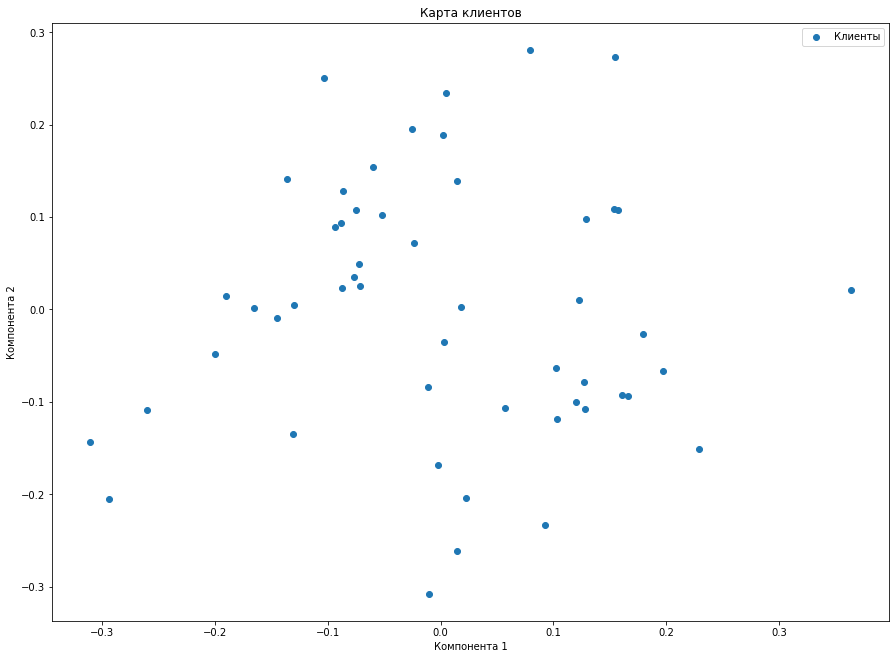

In [277]:
plt.figure(figsize=(15,11)) # задание размера выводимой фигуры
plt.scatter(x=primary_factors[:,0], y=primary_factors[:,1], label = 'Клиенты') # точки - клиенты
plt.xlabel('Компонента 1') # подпись оси x
plt.ylabel('Компонента 2') # подпись оси y
plt.title('Карта клиентов') # название графика
plt.legend() # вывод подписей
plt.show() # вывод графика

Довольно сложно сделать какие-либо выводы до интерпретации скрытых факторов, поэтому они будут представлены в пункте №9. Сейчас же можно сказать, что какой-либо явной линейной зависимости между клиентами не наблюдается.

# Снижение размерности. Интерпретация скрытых факторов.

### 8) Выписать матрицу коэффициентов разложения признаков $z^j$ по главным факторам. Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с каждым из главных факторов.

In [40]:
Zj = np.zeros(shape=(K, Z.shape[1])) # матрица коэффициентов разложения признаков
for k in range(Zj.shape[0]): # идём по количеству скртытых факторов K (строк с коэффициентами)
    for i in range(Zj.shape[1]): # идём по количеству признаков
        Zj[k][i] = S[k] * V_T[k][i] # заполняем столбец, отвечающий за признак i (V_T[k][i] == V[i][k])
Zj = pd.DataFrame(Zj, columns=Z.columns, index=["U_1", "U_2"]) # перевод в данных в DataFrame
Zj

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
U_1,0.079572,0.569579,0.896233,0.022789,0.899128,0.953248
U_2,0.866635,0.736635,-0.216212,0.923100,-0.207232,-0.135814


Чем больше значение (по модулю) — тем сильнее скрытый признак (главный фактор) связан с соответствующим оригинальным признаком.

* Вектор скрытых признаков (главных факторов) $U_1$ тесно связан с первичными признаками "Доход (руб./мес.)", "Оценка автомобиля заемщика (USD)", "Размер кредита (тыс. руб.)".
* Вектор скрытых признаков (главных факторов) $U_2$ тесно связан с первичными признаками "Возраст (лет)", "Срок проживания в регионе (лет)".

Признак "Количество иждивенцев" в значительной мере связан с обоими главными факторами, однако наиболее сильная связь у него с $U_2$.

### 9) На основе анализа структуры матрицы коэффициентов разложения, предложить интерпретацию выделенным главным факторам. Дать интерпретацию построенной выше карте клиентов.

С помощью полученных коэффициентов разложения главные факторы (скрытые признаки) можно интерпретировать следующим образом: 

**1) $U_1$ скорее относится к финансовому благополучию клиента, так как наивысшие коэффициенты у него связаны с денежными показателями**

**2) $U_2$ же — осёдлость, основывается на "выслуге лет" клиента** 

Стоит заметить, что полученный результат сходится с предположением о распределениях признаков, произведённым ещё в первом пункте работы.

In [278]:
# подсчёт интересных точек на карте клиентов
X_point_min_x = primary_factors[:,0].min() # минимальное значение финансового благополучия
index_min_x = list(primary_factors[:,0]).index(X_point_min_x) # номер клиента

X_point_max_x = primary_factors[:,0].max() # максимальное значение финансового благополучия
index_max_x = list(primary_factors[:,0]).index(X_point_max_x) # номер клиента

Y_point_min_y = primary_factors[:,1].min() # минимальное значение осёдлости
index_min_y = list(primary_factors[:,1]).index(Y_point_min_y) # номер клиента

Y_point_max_y = primary_factors[:,1].max() # максимальное значение осёдлости
index_max_y = list(primary_factors[:,1]).index(Y_point_max_y) # номер клиента

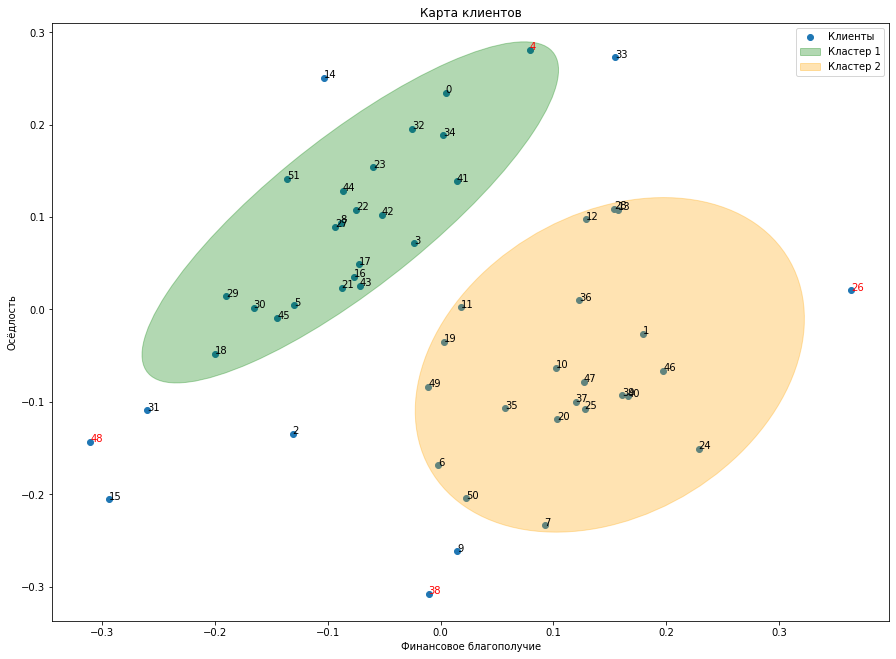

In [279]:
plt.figure(figsize=(15,11)) # задание размера выводимой фигуры
plt.scatter(x=primary_factors[:,0], y=primary_factors[:,1], label = 'Клиенты') # точки - клиенты
for i in range(len(primary_factors)): # подпись клиентов
    if i not in [index_min_x, index_max_x, index_min_y, index_max_y]:
        plt.annotate(i, tuple(primary_factors[i]))
plt.annotate(index_min_x, tuple(primary_factors[index_min_x]), color = 'r') # подпись "интересных" клиентов
plt.annotate(index_max_x, tuple(primary_factors[index_max_x]), color = 'r')
plt.annotate(index_min_y, tuple(primary_factors[index_min_y]), color = 'r')
plt.annotate(index_max_y, tuple(primary_factors[index_max_y]), color = 'r')
plt.gca().add_artist(plt_.Ellipse((-0.08, 0.105), width=0.5, height=0.15, angle=45, color='green', alpha= 0.3, label="Кластер 1")) # возможные области кластеризации
plt.gca().add_artist(plt_.Ellipse((0.15, -0.06), width=0.4, height=0.3, angle=50, color='orange', alpha= 0.3, label="Кластер 2")) # возможные области кластеризации
plt.xlabel('Финансовое благополучие') # подпись оси x
plt.ylabel('Осёдлость') # подпись оси y
plt.title('Карта клиентов') # название графика
plt.legend() # вывод подписей
plt.show() # вывод графика

        На графике представлены клиенты с различными комбинациями скрытых факторов, однако среди них можно попытаться выделить два возможных кластера: 
        1) Клиенты с большим показателем осёдлости, но финансовым благополучием ниже среднего
        2) Клиенты с малой осёдлостью, но хорошим финансовым благополучием

# Снижение размерности. Метод MDS (Multidimensional Scaling = многомерное шкалирование).

### 10) Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний.

Расстояние между клиентами будем вычислять по Эвклидовой формуле (кратчайшая прямая между двумя точками в евклидовом пространстве):

$d_{i,j}=d(x_i,x_j)=\sqrt{\sum_{k=1}^m(x_i^k-x_j^k)^2}$

In [42]:
dist = pd.DataFrame(distance_matrix(Z, Z, p=2)) # матрица расстояний между клиентами, посчитанная по Эвклидовой формуле (p=2)
dist

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.000000,0.505946,0.629708,0.249887,0.166097,0.416337,0.607273,0.719763,0.264188,0.776414,...,0.221192,0.347175,0.222156,0.513730,0.575463,0.515217,0.778597,0.519171,0.661650,0.276377
1,0.505946,0.000000,0.571153,0.388154,0.519082,0.535738,0.404397,0.377160,0.506082,0.534770,...,0.449610,0.464490,0.516212,0.665018,0.246143,0.195391,0.857396,0.431493,0.405194,0.601352
2,0.629708,0.571153,0.000000,0.404654,0.733282,0.300966,0.305715,0.458109,0.398225,0.434529,...,0.426176,0.317929,0.443558,0.428205,0.600360,0.490569,0.350521,0.340223,0.339807,0.451005
3,0.249887,0.388154,0.404654,0.000000,0.369525,0.210751,0.365566,0.500050,0.119518,0.553635,...,0.067997,0.133301,0.137492,0.358675,0.452064,0.342506,0.584213,0.316274,0.424628,0.218746
4,0.166097,0.519082,0.733282,0.369525,0.000000,0.559854,0.693536,0.777926,0.404138,0.845317,...,0.360798,0.461764,0.373288,0.624267,0.564330,0.551220,0.916034,0.590633,0.737402,0.425536
5,0.416337,0.535738,0.300966,0.210751,0.559854,0.000000,0.346116,0.522991,0.164804,0.530160,...,0.199987,0.155452,0.203517,0.286168,0.593782,0.458055,0.386262,0.339942,0.415430,0.213479
6,0.607273,0.404397,0.305715,0.365566,0.693536,0.346116,0.000000,0.187499,0.421641,0.264271,...,0.418809,0.318296,0.472104,0.405644,0.388770,0.257153,0.522783,0.243839,0.071382,0.519685
7,0.719763,0.377160,0.458109,0.500050,0.777926,0.522991,0.187499,0.000000,0.579951,0.274023,...,0.562296,0.481059,0.624493,0.568941,0.332512,0.241283,0.694333,0.360830,0.128709,0.684140
8,0.264188,0.506082,0.398225,0.119518,0.404138,0.164804,0.421641,0.579951,0.000000,0.601251,...,0.072303,0.118991,0.064456,0.302226,0.554024,0.447775,0.517076,0.355638,0.486995,0.108976
9,0.776414,0.534770,0.434529,0.553635,0.845317,0.530160,0.264271,0.274023,0.601251,0.000000,...,0.603018,0.499907,0.652515,0.538462,0.476258,0.398103,0.617486,0.277026,0.237375,0.692878


### 11) Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.

Исходя из теоремы "для заданной матрицы расстояний $dist_{i,j}$ объекты могут быть размещены в некотором эвклидовом пространстве с сохранением расстояний тогда и только тогда, когда матрица $S$ (матрица Грамма, скалярных произведений) - неотрицательно определена" необходимо проверить определённость $S$.

$S=-\frac{1}{2}*(I_n-\frac{U}{n})*\Delta*(I_n-\frac{U}{n})$, где $I_n$ - единичная матрица, $U = (1)_{i,j=1...n}$ - матрица из одних единиц, $\Delta=(dist_{i,j}^2)$ - матрица квадратов расстояний.

In [43]:
n = dist.shape[0] # число клиентов
S = -1/2 * np.matmul(np.matmul(np.eye(n) - np.ones((n, n))/n,(dist ** 2)), (np.eye(n) - np.ones((n, n))/n)) # подсчёт матрицы Грамма
S

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.125969,-0.008468,-0.076390,0.039569,0.147660,0.004481,-0.087863,-0.120536,0.049658,-0.139444,...,0.055756,0.011573,0.069181,-0.009102,-0.035971,-0.038431,-0.079585,-0.047285,-0.107134,0.074304
1,-0.008468,0.113078,-0.047677,-0.010987,0.020286,-0.058804,0.008314,0.060923,-0.049949,0.012530,...,-0.027301,-0.042483,-0.045826,-0.104713,0.092869,0.068759,-0.150487,-0.012054,0.023220,-0.074761
2,-0.076390,-0.047677,0.117784,-0.015174,-0.111489,0.041767,0.045705,0.029469,0.001172,0.063465,...,-0.014686,0.017207,-0.008606,0.027085,-0.054700,-0.030128,0.157997,0.025516,0.049930,0.006702
3,0.039569,-0.010987,-0.015174,0.015612,0.038002,0.013763,-0.025470,-0.041710,0.022235,-0.046469,...,0.022729,0.007776,0.029227,0.003355,-0.027751,-0.019540,-0.002309,-0.017709,-0.033576,0.033393
4,0.147660,0.020286,-0.111489,0.038002,0.196940,-0.030083,-0.108483,-0.128605,0.038378,-0.159830,...,0.050618,0.000712,0.059672,-0.036512,0.005860,-0.022142,-0.160552,-0.051454,-0.124639,0.057442
5,0.004481,-0.058804,0.041767,0.013763,-0.030083,0.056330,0.001810,-0.033086,0.036156,-0.013389,...,0.025402,0.024937,0.038329,0.047092,-0.081500,-0.045433,0.114103,-0.005115,-0.009354,0.054891
6,-0.087863,0.008314,0.045705,-0.025470,-0.108483,0.001810,0.067087,0.091475,-0.033775,0.097605,...,-0.036922,-0.008259,-0.047024,0.011143,0.024596,0.031789,0.057430,0.028315,0.079768,-0.051981
7,-0.120536,0.060923,0.029469,-0.041710,-0.128605,-0.033086,0.091475,0.151018,-0.071091,0.136946,...,-0.065344,-0.031346,-0.088613,-0.026465,0.086851,0.077710,-0.005002,0.034910,0.115998,-0.109002
8,0.049658,-0.049949,0.001172,0.022235,0.038378,0.036156,-0.033775,-0.071091,0.043143,-0.060199,...,0.036193,0.023346,0.050368,0.035774,-0.065276,-0.047370,0.048426,-0.017168,-0.048238,0.065146
9,-0.139444,0.012530,0.063465,-0.046469,-0.159830,-0.013389,0.097605,0.136946,-0.060199,0.197962,...,-0.065599,-0.017118,-0.083034,0.013883,0.052194,0.051047,0.068875,0.085109,0.119580,-0.091547


        Матрица неотрицательно определена тогда и только тогда, когда все её собственные значения неотрицательны.

In [44]:
np.around(np.linalg.eigvalsh(S), 2) # подсчёт собственных значений матрицы Грамма (симметричной вещественной матрицы)

array([-0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
 -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
 -0. , -0. , -0. , -0. , -0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
 0. , 0.07, 0.12, 0.18, 0.52, 2.25, 2.85])

        Все собственные значения - неотрицательные, матрица S получилась неотрицательно определённой.

        Однако, снизить размерность без особых потерь можно лишь на число нулевых собственных значений (разместить объекты в пространстве меньшей размерности, равной числу положительных собственных значений). Поэтому поместить клиентов в евклидово пространство размерности 2 возможно, но с ошибкой, зависящей от числа отброшенных ненулевых собственных чисел.

Положительных собственных значений = 6, следовательно оптимальное снижение до размерности 6.

### 12) Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы.

        Размещение объектов в евклидовом пространстве размерности 2 с помощью MDS:

In [122]:
mds = MDS(n_components=2, max_iter=300, dissimilarity='euclidean', normalized_stress=False) # создаём объект для MDS преобразования
Z_mds = mds.fit_transform(Z) # снижаем размерность с помощю MDS
print(f'Stress value:{mds.stress_}') # вывод ненормализованного стресса (sum of squared distance of the disparities and the distances for all constrained points)

Stress value:4.713470816456315


#### Подсчёт погрешности размещения:

In [128]:
dist_mds = pd.DataFrame(distance_matrix(Z_mds, Z_mds, p=2))# пересчёт Эвклидового расстояния между клиентами, размещёнными в новом пространстве с помощью MDS
dist_mds

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.000000,0.478210,0.644827,0.251447,0.138985,0.421432,0.597777,0.697534,0.268721,0.788554,...,0.224113,0.345806,0.225830,0.535064,0.552204,0.492032,0.790401,0.514780,0.647012,0.275081
1,0.478210,0.000000,0.624501,0.384659,0.471231,0.557773,0.416197,0.370318,0.497493,0.567851,...,0.443897,0.452767,0.513228,0.644903,0.078206,0.145333,0.892628,0.404926,0.418336,0.594316
2,0.644827,0.624501,0.000000,0.402875,0.762113,0.243674,0.240005,0.414393,0.386671,0.287060,...,0.420907,0.299213,0.439553,0.174069,0.628707,0.487069,0.288305,0.219640,0.283792,0.448473
3,0.251447,0.384659,0.402875,0.000000,0.359572,0.214242,0.352176,0.477057,0.112860,0.540401,...,0.065159,0.110251,0.135582,0.326896,0.437239,0.324564,0.593811,0.265407,0.405944,0.213029
4,0.138985,0.471231,0.762113,0.359572,0.000000,0.550606,0.682636,0.753651,0.400200,0.874458,...,0.348377,0.464481,0.361641,0.665659,0.549309,0.524849,0.925049,0.608142,0.724652,0.414062
5,0.421432,0.557773,0.243674,0.214242,0.550606,0.000000,0.332121,0.508646,0.153025,0.477917,...,0.202869,0.110002,0.201944,0.115498,0.592017,0.455277,0.380804,0.246732,0.394403,0.205088
6,0.597777,0.416197,0.240005,0.352176,0.682636,0.332121,0.000000,0.184809,0.404882,0.191970,...,0.402927,0.299673,0.455385,0.346406,0.404564,0.271223,0.528209,0.092330,0.062374,0.503511
7,0.697534,0.370318,0.414393,0.477057,0.753651,0.508646,0.184809,0.000000,0.555204,0.221167,...,0.537669,0.456108,0.600152,0.531142,0.325271,0.243426,0.700653,0.261940,0.130857,0.660133
8,0.268721,0.497493,0.386671,0.112860,0.400200,0.153025,0.404882,0.555204,0.000000,0.579993,...,0.063186,0.105892,0.054083,0.266400,0.548869,0.430724,0.525333,0.312628,0.464676,0.107171
9,0.788554,0.567851,0.287060,0.540401,0.874458,0.477917,0.191970,0.221167,0.579993,0.000000,...,0.586768,0.474372,0.632810,0.450129,0.535823,0.425874,0.541887,0.275068,0.156254,0.670468


По формуле MSE для двумерных матриц: $\frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^n(x_{i,j}-\overline{x}_{ij})^2$

In [161]:
error = 0
for i in range(n): # идём по строкам матрицы
    for j in range(n): # идём по столбцам матрицы
        error += (dist[i][j] - dist_mds[i][j])**2 # сумма квадратов разности
error = error/(n**2) # взятие среднего
print(f"Погрешность размещения по MSE метрике:{error}")

Погрешность размещения по MSE метрике:0.0034778906738455236


        Хоть стресс-значение при MDS размещении довольно велико, погрешность по MSE метрике, однако, оказалась относительно малой.

In [123]:
Z_mds

array([[ 0.34701695, 0.09605045],
 [ 0.10589738, -0.31692193],
 [-0.29438521, 0.1624264 ],
 [ 0.0971799 , 0.06763827],
 [ 0.45105666, 0.00389554],
 [-0.05680772, 0.21659306],
 [-0.22776662, -0.06814763],
 [-0.2583965 , -0.25040057],
 [ 0.09186889, 0.18037294],
 [-0.41757758, -0.09685563],
 [-0.28434528, -0.40411465],
 [ 0.02488436, -0.02662714],
 [ 0.2207542 , -0.15289261],
 [ 0.25265354, -0.19516851],
 [ 0.32032339, 0.27277394],
 [-0.47218328, 0.35604993],
 [ 0.09417418, 0.410034 ],
 [ 0.03608935, 0.13510932],
 [-0.1697577 , 0.30940304],
 [-0.0360304 , -0.01884971],
 [-0.12804683, -0.24654012],
 [-0.00963192, 0.14845765],
 [ 0.1205973 , 0.16502796],
 [ 0.22674963, 0.18480434],
 [-0.04189137, -0.44721552],
 [-0.05286918, -0.25344865],
 [ 0.24315072, -0.58063892],
 [ 0.08233001, 0.18687799],
 [ 0.2520011 , -0.1890995 ],
 [-0.0730964 , 0.31642239],
 [-0.07375294, 0.27166679],
 [-0.29148729, 0.38020835],
 [ 0.27422198, 0.12482099],
 [ 0.47797731, -0.12005093],
 [ 0.27642072, 0.0801652 ],
 [-0.40086178, -0.30133188],
 [ 0.11613562, -0.20229115],
 [-0.04741527, -0.23581985],
 [-0.45726227, -0.09590116],
 [-0.01624598, -0.29991823],
 [-0.01378647, -0.3096573 ],
 [ 0.21336981, 0.03959634],
 [ 0.12499075, 0.12656436],
 [ 0.00232984, 0.12384024],
 [ 0.14396671, 0.19489224],
 [-0.15854373, 0.27127098],
 [ 0.04543798, -0.36652822],
 [-0.01535068, -0.23679299],
 [-0.36349487, 0.4423253 ],
 [-0.15695066, -0.00890246],
 [-0.26299093, -0.11962404],
 [ 0.1393506 , 0.2764513 ]])

#### Сравнение карт клиентов:

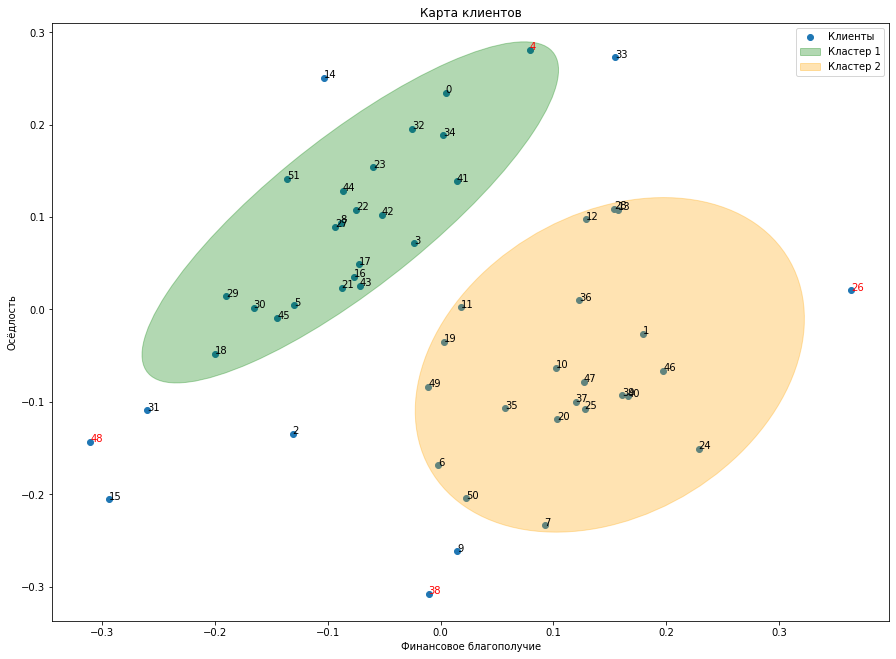

In [239]:
plt.figure(figsize=(15,11)) # задание размера выводимой фигуры
plt.scatter(x=primary_factors[:,0], y=primary_factors[:,1], label = 'Клиенты') # точки - клиенты
for i in range(len(primary_factors)): # подпись клиентов
    if i not in [index_min_x, index_max_x, index_min_y, index_max_y]:
        plt.annotate(i, tuple(primary_factors[i]))
plt.annotate(index_min_x, tuple(primary_factors[index_min_x]), color = 'r') # подпись "интересных" клиентов
plt.annotate(index_max_x, tuple(primary_factors[index_max_x]), color = 'r')
plt.annotate(index_min_y, tuple(primary_factors[index_min_y]), color = 'r')
plt.annotate(index_max_y, tuple(primary_factors[index_max_y]), color = 'r')
plt.gca().add_artist(plt_.Ellipse((-0.08, 0.105), width=0.5, height=0.15, angle=45, color='green', alpha= 0.3, label="Кластер 1")) # возможные области кластеризации
plt.gca().add_artist(plt_.Ellipse((0.15, -0.06), width=0.4, height=0.3, angle=50, color='orange', alpha= 0.3, label="Кластер 2")) # возможные области кластеризации
plt.xlabel('Финансовое благополучие') # подпись оси x
plt.ylabel('Осёдлость') # подпись оси y
plt.title('Карта клиентов') # название графика
plt.legend() # вывод подписей
plt.show() # вывод графика

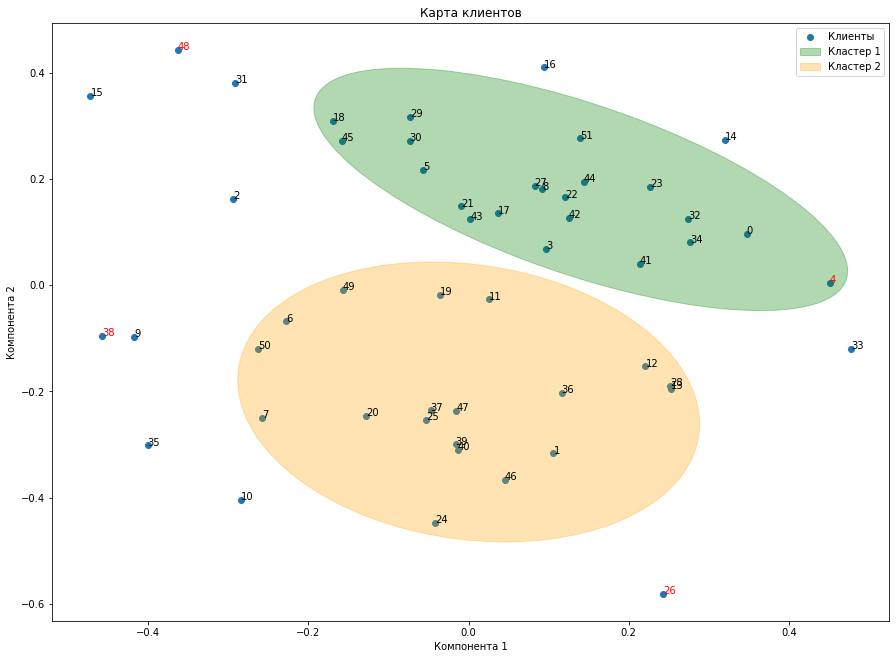

In [281]:
plt.figure(figsize=(15,11)) # задание размера выводимой фигуры
plt.scatter(x=Z_mds[:,0], y=Z_mds[:,1], label = 'Клиенты') # точки - клиенты
for i in range(len(Z_mds)): # подпись клиентов
    if i not in [index_min_x, index_max_x, index_min_y, index_max_y]:
        plt.annotate(i, tuple(Z_mds[i]))
plt.annotate(index_min_x, tuple(Z_mds[index_min_x]), color = 'r') # подпись "интересных" клиентов
plt.annotate(index_max_x, tuple(Z_mds[index_max_x]), color = 'r')
plt.annotate(index_min_y, tuple(Z_mds[index_min_y]), color = 'r')
plt.annotate(index_max_y, tuple(Z_mds[index_max_y]), color = 'r')
plt.gca().add_artist(plt_.Ellipse((0.14, 0.18), width=0.75, height=0.3, angle=-30, color='green', alpha= 0.3, label="Кластер 1")) # возможные области кластеризации
plt.gca().add_artist(plt_.Ellipse((0.0, -0.22), width=0.6, height=0.5, angle=-30, color='orange', alpha= 0.3, label="Кластер 2")) # возможные области кластеризации
plt.xlabel('Компонента 1') # подпись оси x
plt.ylabel('Компонента 2') # подпись оси y
plt.title('Карта клиентов') # название графика
plt.legend() # вывод подписей
plt.show() # вывод графика

        Сравнивая карты клиентов с шага 7 и 12 легко можно заметить, что графики изменились. Однако, основное отличие заключается в том, что в MDS график будто был повёрнут примерно на 90 градусов по часовой стрелке. Также можно заметить, что некоторые "интересные" (с минимальными и максимальными значениями факторов в PCA) клиенты немного сместились, но в целом они остаются близкими к границам значений. Разброс возможных значений (координат) в MDS увеличился.

<b> 
Выводы: в ходе выполнения работы была проведена предобработка данных (заполнение пропусков, обработка выбросов, центрирование и нормирование), а также изучены следующие методы снижения размерности: PCA (Principal Component Analysis) и MDS (Multidimensional Scaling), проведено их сравнение и предоставлена интерпретация полученных результатов.
</b>